In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datasketch import MinHash, MinHashLSHForest

In [52]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Dataset.csv', header=0, index_col=0)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.6f}'.format)

In [3]:
df.head()

key_voysen       name_voysen    brand_voysen             key_source  \
0  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
1  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
2  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
3  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
4  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   

                                                                                     name_source  \
0  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
1  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
2  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
3  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
4  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   

     brand_source       source  \
0  LA ROCHE-POSAY  easypara_fr   
1  LA ROCHE-POSAY  easypara_fr   
2  LA ROCHE-POSAY  easypara_fr   
3  LA ROCHE-POSAY  easypara_fr   
4  LA ROCHE-POSAY  easypara_fr   

                                                                                                                            url_source  \
0  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
1  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
2  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
3  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
4  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   

  writer_age writer_sex  ...  date_year  date_datetime  review_rating  \
0     unknow     unknow  ...       2015     30-10-2015              4   
1     unknow     unknow  ...       2015     30-10-2015              5   
2     unknow     unknow  ...       2015     30-10-2015              5   
3     unknow     unknow  ...       2015     30-10-2015              4   
4     unknow     unknow  ...       2015     30-10-2015              4   

                        review_title  \
0  Dans l&#39;ensemble tres bon soin   
1                        Must have !   
2                    Très efficace !   
3                        Bon produit   
4                    Révolutionnaire   

                                                                                                                                                                                               review_text  \
0                                                       Je trouve la texture très agréable et une bonne efficacité sur les imperfections . Peau sensible s&#39;abstenir car un peu agressif tout de même .   
1                   C&#39;est juste parfait !! Cette crème ne laisse pas la peau grasse et prévient des imperfections. Je l&#39;utilise tous les jours et n&#39;ai aucun problème de peau ! Je recommande.   
2                                                                                        Cela fait maintenant 2 ans que je l&#39;utilise et sa a beaucoup réduis mon acné, j&#39;en suis très satisfaite !   
3                                                                                            Très bon produit, je l&#39;utilise quotidiennement matin et soir et il contribue à faire diminuer l&#39;acné.   
4  Ça fait un peu moins d&#39;un moins que je test ce produit et je suis vraiment satisfaite, il fait bien son job et ne dessèche pas la peau! Enfin j&#39;ai trouvé un produit qui me correspond ! Me

Data Exploration

In [4]:
df.shape

(18159, 23)

In [5]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            18149, 18150, 18151, 18152, 18153, 18154, 18155, 18156, 18157,
            18158],
           dtype='int64', length=18159)

In [6]:
df.columns

Index(['key_voysen', 'name_voysen', 'brand_voysen', 'key_source',
       'name_source', 'brand_source', 'source', 'url_source', 'writer_age',
       'writer_sex', 'writer_recommendation', 'date_day', 'date_month',
       'date_year', 'date_datetime', 'review_rating', 'review_title',
       'review_text', 'verified_purchase', 'is_fake', 'unique_reviews',
       'country', 'language'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18158
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   key_voysen             18159 non-null  object 
 1   name_voysen            18159 non-null  object 
 2   brand_voysen           18159 non-null  object 
 3   key_source             18159 non-null  float64
 4   name_source            18159 non-null  object 
 5   brand_source           18159 non-null  object 
 6   source                 18159 non-null  object 
 7   url_source             18159 non-null  object 
 8   writer_age             18159 non-null  object 
 9   writer_sex             18159 non-null  object 
 10  writer_recommendation  18159 non-null  int64  
 11  date_day               18159 non-null  int64  
 12  date_month             18159 non-null  int64  
 13  date_year              18159 non-null  int64  
 14  date_datetime          18159 non-null  object 
 15  re

In [8]:
df.describe()

key_source  writer_recommendation     date_day   date_month  \
count           18159.000000           18159.000000 18159.000000 18159.000000   
mean  105210215165196.921875               0.154524    16.276172     6.943664   
std              1402.964623               0.361460     9.153517     3.743845   
min   105210215162177.000000               0.000000     1.000000     1.000000   
25%   105210215164772.000000               0.000000     8.000000     3.000000   
50%   105210215165165.000000               0.000000    17.000000     8.000000   
75%   105210215165838.500000               0.000000    24.000000    10.000000   
max   105210215167951.000000               1.000000    31.000000    12.000000   

         date_year  review_rating  verified_purchase      is_fake  \
count 18159.000000   18159.000000       18159.000000 18159.000000   
mean   2017.749876       4.629991           0.014593     0.000000   
std       1.676568       0.647332           0.119921     0.000000   
min    2011.000000       1.000000           0.000000     0.000000   
25%    2017.000000       4.000000           0.000000     0.000000   
50%    2018.000000       5.000000           0.000000     0.000000   
75%    2019.000000       5.000000           0.000000     0.000000   
max    2022.000000       5.000000           1.000000     0.000000   

       unique_reviews  
count    18159.000000  
mean         0.968886  
std          0.173631  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

Check for missing values

In [42]:
df.isnull().sum()

key_voysen                  0
name_voysen                 0
brand_voysen                0
key_source                  0
name_source                 0
brand_source                0
source                      0
url_source                  0
writer_age                  0
writer_sex                  0
writer_recommendation       0
date_day                    0
date_month                  0
date_year                   0
date_datetime               0
review_rating               0
review_title             1152
review_text                10
verified_purchase           0
is_fake                     0
unique_reviews              0
country                     0
language                    0
dtype: int64

In [10]:
null_data = df.loc[df.isnull().any(axis=1)]
null_data.head(1)

key_voysen                name_voysen    brand_voysen  \
66  V201123131848  Tolériane Sensitive Crème  La Roche Posay   

               key_source  \
66 105210215165531.000000   

                                                                         name_source  \
66  Creme Soin Hydratant Apaisant Protecteur Sensitive 40ml Toleriane La Roche-Posay   

      brand_source       source  \
66  LA ROCHE-POSAY  easypara_fr   

                                                                                                                 url_source  \
66  https://www.easyparapharmacie.com/creme-soin-hydratant-apaisant-protecteur-40ml-toleriane-sensitive-la-roche-posay.html   

   writer_age writer_sex  ...  date_year  date_datetime  review_rating  \
66     unknow     unknow  ...       2019     19-01-2019              4   

    review_title  \
66           NaN   

                                                                                                                                                                                                                                                   review_text  \
66  I liked this cream! Super hydrating and fragrance free. It didnt leave my face feeling oily at all, even when used under my makeup or after a really long day at work. I also used it as a night cream and i woke up with super soft, smooth looking skin!   

    verified_purchase is_fake unique_reviews  country  language  
66                  0       0              1       fr        en  

[1 rows x 23 columns]

In [53]:
df1 = df.dropna()

In [54]:
df1.shape

(17002, 23)

In [55]:
df1.isna().sum()

key_voysen               0
name_voysen              0
brand_voysen             0
key_source               0
name_source              0
brand_source             0
source                   0
url_source               0
writer_age               0
writer_sex               0
writer_recommendation    0
date_day                 0
date_month               0
date_year                0
date_datetime            0
review_rating            0
review_title             0
review_text              0
verified_purchase        0
is_fake                  0
unique_reviews           0
country                  0
language                 0
dtype: int64

In [56]:
df2 = df1

In [57]:
df2.shape

(17002, 23)

Data Preprocessing

Solve encoding issues

In [58]:
df2['review_text'] = df2['review_text'].str.replace('&#39;', "'").str.replace('Ã©', 'é').str.replace('Ã¨', 'è').str.replace('Ã ', 'à').str.replace('Ãª', 'ê').str.replace('Ã®', 'î').str.replace('Ã´', 'ô').str.replace('Ã»', 'û').str.replace('Ã§', 'ç').str.replace('Â', '').str.replace('&lt;br/&gt;', '\n')
df2['review_title'] = df2['review_title'].str.replace('&#39;', "'").str.replace('Ã©', 'é').str.replace('Ã¨', 'è').str.replace('Ã ', 'à').str.replace('Ãª', 'ê').str.replace('Ã®', 'î').str.replace('Ã´', 'ô').str.replace('Ã»', 'û').str.replace('Ã§', 'ç').str.replace('Â', '').str.replace('&lt;br/&gt;', '\n')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7948\2346639951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['review_text'] = df2['review_text'].str.replace('&#39;', "'").str.replace('Ã©', 'é').str.replace('Ã¨', 'è').str.replace('Ã ', 'à').str.replace('Ãª', 'ê').str.replace('Ã®', 'î').str.replace('Ã´', 'ô').str.replace('Ã»', 'û').str.replace('Ã§', 'ç').str.replace('Â', '').str.replace('&lt;br/&gt;', '\n')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7948\2346639951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

 Remove URLs, emails, phone numbers, punctuations, stop words, Convert to lowercase, lemmatization and spell checking

In [35]:
import re
import spacy
import nltk
from langdetect import detect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load English and French stop words
stop_words_en = set(stopwords.words('english'))
stop_words_fr = set(stopwords.words('french'))

# Load English and French language models
nlp_en = spacy.load('en_core_web_sm')
nlp_fr = spacy.load('fr_core_news_sm')

def clean_text(text):
    # Remove URLs, emails, phone numbers & punctuations
    text = re.sub(r'http\S+|www.\S+|@\S+|\d+|[^\w\s]','', text)
    # Remove non-ascii characters
    text = text.encode('ascii', 'ignore').decode('utf-8')
    # Tokenize text and remove short words
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if len(word) > 2]
    # Lemmatize words
    doc = nlp_en(" ".join(words))
    words = [token.lemma_ for token in doc]
    doc = nlp_fr(" ".join(words))
    words = [token.lemma_ for token in doc]
    # Remove stop words
    filtered_words = [word for word in words if word not in stop_words_en and word not in stop_words_fr]
    return " ".join(filtered_words)

In [36]:
# Apply the function to the 'text_review' column of your DataFrame
df2['review_text'] = df2['review_text'].apply(clean_text)
df2['review_title'] = df2['review_title'].apply(clean_text)

In [37]:
df2.head()

key_voysen       name_voysen    brand_voysen             key_source  \
0  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
1  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
2  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
3  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
4  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   

                                                                                     name_source  \
0  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
1  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
2  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
3  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
4  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   

     brand_source       source  \
0  LA ROCHE-POSAY  easypara_fr   
1  LA ROCHE-POSAY  easypara_fr   
2  LA ROCHE-POSAY  easypara_fr   
3  LA ROCHE-POSAY  easypara_fr   
4  LA ROCHE-POSAY  easypara_fr   

                                                                                                                            url_source  \
0  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
1  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
2  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
3  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
4  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   

  writer_age writer_sex  ...  date_year  date_datetime  review_rating  \
0     unknow     unknow  ...       2015     2015-10-30              4   
1     unknow     unknow  ...       2015     2015-10-30              5   
2     unknow     unknow  ...       2015     2015-10-30              5   
3     unknow     unknow  ...       2015     2015-10-30              4   
4     unknow     unknow  ...       2015     2015-10-30              4   

                review_title  \
0  dan lensembl tre bon soin   
1                   must hav   
2                tr efficace   
3                bon produit   
4              rvolutionnair   

                                                                                                                           review_text  \
0                                trouve texture tr agrabl bon efficacit imperfection peau sensible sabstenir car peu agressif tout mme   
1                         juste parfaire crme laisse peau gras prvient imperfection lutilis tout jour nai aucun problme peau recommand   
2                                                              cela faire maintenant lutilis beaucoup rduis acn jen sui trs satisfaire   
3                                                     trs bon produit lutilis quotidiennement matin soir contribue faire diminuer lacn   
4  faire peu moin dun moin test produire être vraiment satisfait fait bien job dessche peau enfin jai trouv produit correspondre merci   

   verified_purchase is_fake unique_reviews  country  language  
0                  0       0              1       fr        fr  
1                  0       0              1       fr        fr  
2                  0       0              1       fr        fr  
3                  0       0              1       fr        fr  
4                  0       0              1       fr        fr  

[5 rows x 23 columns]

Detect all the duplicates that have the same 'review_text' to an extent (depending on the similarity degree)

In [22]:
# Define the number of permutation functions to use in MinHash
num_perm = 128

# Create MinHash objects for each review
minhash_list = []
for review in df2['review_text']:
    words = review.lower().split()
    minhash = MinHash(num_perm=num_perm)
    for word in words:
        minhash.update(word.encode('utf8'))
    minhash_list.append(minhash)

# Create an LSH forest and add the MinHash objects
lsh_forest = MinHashLSHForest(num_perm=num_perm)
for i, minhash in enumerate(minhash_list):
    lsh_forest.add(i, minhash)

# Index the forest
lsh_forest.index()

similar_pairs = []
for i, minhash in enumerate(minhash_list):
    results = lsh_forest.query(minhash, 5)
    for j in results:
        if i < j:
            sim = minhash.jaccard(minhash_list[j]) #The Jaccard similarity is a measure of similarity between two sets, defined as the size of the intersection of the sets divided by the size of the union of the sets.
            if sim >= 0.4:
                similar_pairs.append((i, j, sim, df2.index[i], df2.index[j]))

# Sort the similar review pairs by similarity score
similar_pairs.sort(key=lambda x: x[2], reverse=True)

# Print the similar review pairs
for pair in similar_pairs:
    print(df2.loc[pair[3], 'review_text'])
    print('Row:', pair[3])
    print(df2.loc[pair[4], 'review_text'])
    print('Row:', pair[4])
    print('Similarity score:', pair[2])
    print()

C'est le meilleur des crèmes que j'ai pus tester! Je trouve ma peaux beaucoup plus net depuis que je l'utilise, de plus elle m'aide dans la guérison de mon acné ! Bref, une crème très efficace.
Row: 8
C'est le meilleur des crèmes que j'ai pus tester! Je trouve ma peaux beaucoup plus net depuis que je l'utilise, de plus elle m'aide dans la guérison de mon acné ! Bref, une crème très efficace.
Row: 6973
Similarity score: 1.0

C'est un bon produit , le seul inconvénient c'est qu'il rend la peau grasse , Mais sinon j'aime beaucoup ce produit
Row: 13
C'est un bon produit , le seul inconvénient c'est qu'il rend la peau grasse , Mais sinon j'aime beaucoup ce produit
Row: 6974
Similarity score: 1.0

Je teste ce produit depuis un mois et demi et j'en suis hyper satisfaite ! J'ai la peau très sèche et c'est la première fois que je trouve une crème qui me convient et qui ne soit pas grasse.
Row: 15
Je teste ce produit depuis un mois et demi et j'en suis hyper satisfaite ! J'ai la peau très sèche 

Delete all the rows of the duplicated rows that have the same texts

In [115]:
indices_to_delete = []
for pair in similar_pairs:
    indices_to_delete.append(pair[4])

df2.drop(index=indices_to_delete, inplace=True)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
df2.shape

(13275, 23)

Delete all the rows of the duplicated rows that have the same texts V2 (using a loop while to completely detect all of them and erase their rows)

In [49]:
def remove_similar_rows(df, threshold=0.4, num_perm=128, num_neighbours=5):
    # Create MinHash objects for each review
    minhash_list = []
    for review in df['review_text']:
        words = review.lower().split()
        minhash = MinHash(num_perm=num_perm)
        for word in words:
            minhash.update(word.encode('utf8'))
        minhash_list.append(minhash)

    # Create an LSH forest and add the MinHash objects
    lsh_forest = MinHashLSHForest(num_perm=num_perm)
    for i, minhash in enumerate(minhash_list):
        lsh_forest.add(i, minhash)

    # Index the forest
    lsh_forest.index()

    # Find similar pairs of reviews
    similar_pairs = []
    for i, minhash in enumerate(minhash_list):
        results = lsh_forest.query(minhash, num_neighbours)
        for j in results:
            if i < j:
                sim = minhash.jaccard(minhash_list[j])
                if sim >= threshold:
                    similar_pairs.append((i, j, sim, df.index[i], df.index[j]))

    # Remove similar rows
    indices_to_delete = []
    for pair in similar_pairs:
        indices_to_delete.append(pair[4])
    df.drop(index=indices_to_delete, inplace=True)
    
    return df, similar_pairs

# Call the function in a while loop until no similar rows are left
while True:
    df2, similar_pairs = remove_similar_rows(df2)
    if not similar_pairs:
        break

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
df2.shape

(11542, 23)

Delete only the rows of the duplicated that have the same 'review_text' but within a period of 6 months letting only the oldest one

In [59]:
def remove_similar_rows(df, threshold=0.4, num_perm=128, num_neighbours=5):
    # Convert date column to datetime
    df['date_datetime'] = pd.to_datetime(df['date_datetime'])

    # Create MinHash objects for each review
    minhash_list = []
    for review in df['review_text']:
        words = review.lower().split()
        minhash = MinHash(num_perm=num_perm)
        for word in words:
            minhash.update(word.encode('utf8'))
        minhash_list.append(minhash)

    # Create an LSH forest and add the MinHash objects
    lsh_forest = MinHashLSHForest(num_perm=num_perm)
    for i, minhash in enumerate(minhash_list):
        lsh_forest.add(i, minhash)

    # Index the forest
    lsh_forest.index()

    # Find similar pairs of reviews
    similar_pairs = []
    indices_to_delete = []
    for i, minhash in enumerate(minhash_list):
        results = lsh_forest.query(minhash, num_neighbours)
        for j in results:
            if i < j:
                sim = minhash.jaccard(minhash_list[j])
                if sim >= threshold:
                    date1 = df.loc[df.index[i], 'date_datetime']
                    date2 = df.loc[df.index[j], 'date_datetime']
                    if abs((date1 - date2).days) <= 180:
                        if date1 < date2:
                            similar_pairs.append((i, j, sim, df.index[i], df.index[j], date1))
                            indices_to_delete.append(df.index[j])
                        else:
                            similar_pairs.append((i, j, sim, df.index[i], df.index[j], date2))
                            indices_to_delete.append(df.index[i])

    # Remove similar rows
    indices_to_delete = list(set(indices_to_delete))
    df.drop(index=indices_to_delete, inplace=True)
    
    return df, similar_pairs

In [60]:
# Call the function in a while loop until no similar rows are left
while True:
    df2, similar_pairs = remove_similar_rows(df2)
    if not similar_pairs:
        break

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7948\1737510267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_datetime'] = pd.to_datetime(df['date_datetime'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7948\1737510267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_datetime'] = pd.to_datetime(df['date_datetime'])
c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [61]:
df2.shape

(12168, 23)

Checking on the duplicates that have the same 'text_review' + their dates V1

In [ ]:
# Define the number of permutation functions to use in MinHash
num_perm = 128

# Create MinHash objects for each review
minhash_list = []
for review in df2['review_text']:
    words = review.lower().split()
    minhash = MinHash(num_perm=num_perm)
    for word in words:
        minhash.update(word.encode('utf8'))
    minhash_list.append(minhash)

# Create an LSH forest and add the MinHash objects
lsh_forest = MinHashLSHForest(num_perm=num_perm)
for i, minhash in enumerate(minhash_list):
    lsh_forest.add(i, minhash)

# Index the forest
lsh_forest.index()

similar_pairs = []
for i, minhash in enumerate(minhash_list):
    results = lsh_forest.query(minhash, 5)
    for j in results:
        if i < j:
            sim = minhash.jaccard(minhash_list[j])
            if sim >= 0.6:
                date1 = df2.loc[df2.index[i], 'date_datetime']
                date2 = df2.loc[df2.index[j], 'date_datetime']
                similar_pairs.append((i, j, sim, df2.index[i], df2.index[j], date1, date2))

# Sort the similar review pairs by similarity score
similar_pairs.sort(key=lambda x: x[2], reverse=True)

# Print the similar review pairs
for pair in similar_pairs:
    print(df2.loc[pair[3], 'review_text'])
    print('Row:', pair[3], 'Date:', pair[5])
    print(df2.loc[pair[4], 'review_text'])
    print('Row:', pair[4], 'Date:', pair[6])
    print('Similarity score:', pair[2])
    print()

Checking on the duplicates that have the same columns 'name_voysen','review_rating', 'review_title' and 'text_review' within the 6-month period letting the oldest duplicate

In [23]:
# Define a function to remove duplicates within a 6-month period
def remove_duplicate_rows(df):
    # Sort the DataFrame by date_datetime
    df = df.sort_values(by='date_datetime')
    # Create a new DataFrame to store the rows to keep
    df_keep = pd.DataFrame(columns=df.columns)
    # Loop over each row in the sorted DataFrame
    for i, row in df.iterrows():
        # Define the start and end dates for the 6-month period
        start_date = row['date_datetime'] - timedelta(days=180)
        end_date = row['date_datetime']
        # Check if there are any rows in the df_keep DataFrame that have the same values in the columns to compare
        duplicate_rows = df_keep[(df_keep['name_voysen'] == row['name_voysen']) & 
                                 (df_keep['review_rating'] == row['review_rating']) & 
                                 (df_keep['review_title'] == row['review_title']) & 
                                 (df_keep['review_text'] == row['review_text'])]
        # If there are no duplicates, add the row to the df_keep DataFrame
        if len(duplicate_rows) == 0:
            df_keep = df_keep.append(row)
        # If there are duplicates, check if the row is within the 6-month period of the oldest duplicate
        else:
            oldest_duplicate_date = duplicate_rows['date_datetime'].min()
            if row['date_datetime'] >= start_date and oldest_duplicate_date < start_date:
                df_keep = df_keep.append(row)
    # Sort the df_keep DataFrame by date_datetime
    df_keep = df_keep.sort_values(by='date_datetime')
    # Return the df_keep DataFrame
    return df_keep

In [ ]:
# Call the function to remove duplicates within each 6-month period
df2_keep = remove_duplicate_rows(df2)
df2_keep

Apply the 2 algorithms together V1 (without checking similarity for review_title)

In [138]:
def remove_similar_rows(df, threshold=0.6, num_perm=128, num_neighbours=5):
    # Convert date column to datetime
    df['date_datetime'] = pd.to_datetime(df['date_datetime'])

    # Create MinHash objects for each review
    minhash_list = []
    for review in df['review_text']:
        words = review.lower().split()
        minhash = MinHash(num_perm=num_perm)
        for word in words:
            minhash.update(word.encode('utf8'))
        minhash_list.append(minhash)

    # Create an LSH forest and add the MinHash objects
    lsh_forest = MinHashLSHForest(num_perm=num_perm)
    for i, minhash in enumerate(minhash_list):
        lsh_forest.add(i, minhash)

    # Index the forest
    lsh_forest.index()

    # Find similar pairs of reviews
    similar_pairs = []
    indices_to_delete = []
    for i, minhash in enumerate(minhash_list):
        results = lsh_forest.query(minhash, num_neighbours)
        for j in results:
            if i < j:
                sim = minhash.jaccard(minhash_list[j])
                if sim >= threshold:
                    row_i = df.loc[df.index[i]]
                    row_j = df.loc[df.index[j]]
                    # Compare name_voysen, review_rating, and review_title columns
                    if (row_i['name_voysen'] == row_j['name_voysen'] and row_i['review_rating'] == row_j['review_rating'] and row_i['review_title'] == row_j['review_title']):
                        date1 = row_i['date_datetime']
                        date2 = row_j['date_datetime']
                        if abs((date1 - date2).days) <= 180:
                            if date1 < date2:
                                similar_pairs.append((i, j, sim, df.index[i], df.index[j], date1))
                                indices_to_delete.append(df.index[j])
                            else:
                                similar_pairs.append((i, j, sim, df.index[i], df.index[j], date2))
                                indices_to_delete.append(df.index[i])
                        else:
                            similar_pairs.append((i, j, sim, df.index[i], df.index[j], date1))
                            similar_pairs.append((i, j, sim, df.index[i], df.index[j], date2))
                    # If only review_text is identical, apply removal based on date
                    #else:
                    #    date1 = row_i['date_datetime']
                    #    date2 = row_j['date_datetime']
                    #    if abs((date1 - date2).days) <= 180:
                    #        if date1 < date2:
                    #            similar_pairs.append((i, j, sim, df.index[i], df.index[j], date1))
                    #            indices_to_delete.append(df.index[j])
                    #        else:
                    #            similar_pairs.append((i, j, sim, df.index[i], df.index[j], date2))
                    #            indices_to_delete.append(df.index[i])

    # Remove similar rows
    indices_to_delete = list(set(indices_to_delete))
    df.drop(index=indices_to_delete, inplace=True)

    return df, similar_pairs


In [ ]:
# Call the function in a while loop until no similar rows are left
while True:
    df2, similar_pairs = remove_similar_rows(df2)
    if not similar_pairs:
        break

In [24]:
df2.shape

(17002, 23)

Apply the 2 algorithms together V2 (with checking similarity for review_title)

In [29]:
num_perm = 128
num_neighbours = 5
threshold=0.6
similar_pairs_text = []

In [30]:
class sim():
    
    def __init__(self, df=df, threshold=threshold, num_perm=num_perm, num_neighbours=num_neighbours):
        self.threshold = threshold
        self.num_perm = num_perm
        self.num_neighbours = num_neighbours
        self.df = df 
        # Convert date column to datetime
        df['date_datetime'] = pd.to_datetime(df['date_datetime'])
    
    def remove_similar_rows(self, df=df, threshold=threshold, num_perm=num_perm, num_neighbours=num_neighbours):

        # Create MinHash objects for each review text
        minhash_list_text = []
        for review in df['review_text']:
            words = review.lower().split()
            minhash = MinHash(num_perm=num_perm)
            for word in words:
                minhash.update(word.encode('utf8'))
            minhash_list_text.append(minhash)

        # Create an LSH forest and add the MinHash objects for review text
        lsh_forest_text = MinHashLSHForest(num_perm=num_perm)
        for i, minhash in enumerate(minhash_list_text):
            lsh_forest_text.add(i, minhash)

        # Index the forest for review text
        lsh_forest_text.index()

        # Find similar pairs of reviews based on review text
        similar_pairs_text = []
        indices_to_delete_text = []
        for i, minhash in enumerate(minhash_list_text):
            results = lsh_forest_text.query(minhash, num_neighbours)
            for j in results:
                if i < j:
                    sim = minhash.jaccard(minhash_list_text[j])
                    if sim >= threshold:
                        row_i = df.loc[df.index[i]]
                        row_j = df.loc[df.index[j]]
                        date1 = row_i['date_datetime']
                        date2 = row_j['date_datetime']
                        if abs((date1 - date2).days) <= 180:
                            if date1 < date2:
                                similar_pairs_text.append((i, j, sim, df.index[i], df.index[j], date1))
                                indices_to_delete_text.append(df.index[j])
                            else:
                                similar_pairs_text.append((i, j, sim, df.index[i], df.index[j], date2))
                                indices_to_delete_text.append(df.index[i])
                        else:
                            similar_pairs_text.append((i, j, sim, df.index[i], df.index[j], date1))
                            similar_pairs_text.append((i, j, sim, df.index[i], df.index[j], date2))
                            
        
        #Remove similar rows from the dataframe
        df = df[~df.index.isin(indices_to_delete_text)]
        
        return df,similar_pairs_text
    
    def find_similar_titles(self, df=df, similar_pairs_text=similar_pairs_text, threshold=threshold, num_perm=num_perm, num_neighbours=num_neighbours):
        # Create MinHash objects for each review title
        minhash_list_title = []
        for title in df['review_title']:
            words = title.lower().split()
            minhash = MinHash(num_perm=num_perm)
            for word in words:
                minhash.update(word.encode('utf8'))
            minhash_list_title.append(minhash)

        # Create an LSH forest and add the MinHash objects for review title
        lsh_forest_title = MinHashLSHForest(num_perm=num_perm)
        for i, minhash in enumerate(minhash_list_title):
            lsh_forest_title.add(i, minhash)

        # Index the forest for review title
        lsh_forest_title.index()

        # Find similar pairs of reviews based on review title within similar pairs of reviews based on review text
        similar_pairs_title = []
        indices_to_delete_title = []
        for pair in similar_pairs_text:
            i, j, _, _, _, _ = pair
            if j < len(minhash_list_title):
                minhash_i = minhash_list_title[i]
                minhash_j = minhash_list_title[j]
                sim = minhash_i.jaccard(minhash_j)
                if sim >= threshold:
                    row_i = df.loc[df.index[i]]
                    row_j = df.loc[df.index[j]]
                    date1 = row_i['date_datetime']
                    date2 = row_j['date_datetime']
                    if (row_i['name_voysen'] == row_j['name_voysen'] and row_i['review_rating'] == row_j['review_rating']):
                            date1 = row_i['date_datetime']
                            date2 = row_j['date_datetime']
                            if abs((date1 - date2).days) <= 180:
                                if date1 < date2:
                                    similar_pairs_title.append((i, j, sim, df.index[i], df.index[j], date1))
                                    indices_to_delete_title.append(df.index[j])
                                else:
                                    similar_pairs_title.append((i, j, sim, df.index[i], df.index[j], date2))
                                    indices_to_delete_title.append(df.index[i])                          
                                    
                    else:
                            if abs((date1 - date2).days) <= 180:
                                if date1 < date2:
                                    similar_pairs_title.append((i, j, sim, df.index[i], df.index[j], date1))
                                    indices_to_delete_title.append(df.index[j])
                                else:
                                    similar_pairs_title.append((i, j, sim, df.index[i], df.index[j], date2))
                                    indices_to_delete_title.append(df.index[i])

            # Remove similar rows from the dataframe
            df = df[~df.index.isin(indices_to_delete_title)]

        return df

In [31]:
num_perm = 128
num_neighbours = 5
threshold=0.6

# create an instance of the sim class
my_sim = sim(df=df2, threshold=threshold, num_perm=num_perm, num_neighbours=num_neighbours)

# remove similar rows based on review text
df2, similar_pairs_text = my_sim.remove_similar_rows(df2, threshold=threshold, num_perm=num_perm, num_neighbours=num_neighbours)

# remove similar rows based on review title using results from the previous step
df2 = my_sim.find_similar_titles(df2, similar_pairs_text, threshold=threshold, num_perm=num_perm, num_neighbours=num_neighbours)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7948\242872456.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_datetime'] = pd.to_datetime(df['date_datetime'])


In [32]:
df2.shape

(12271, 23)

Reviews Analysis

Top Review Counts With Brand and review_rating

In [33]:
Customer_Ratings = df2.groupby(
    'brand_voysen'
    ).review_rating.agg(
        ['count', 'min', 'max']
    ).sort_values(
        'count', ascending=False
    )
Customer_Ratings

count  min  max
brand_voysen                   
La Roche Posay  12271    1    5

In [34]:
Product_Ratings = df2.groupby(
    'name_voysen'
    ).review_rating.agg(
        ['count', 'min', 'max']
    ).sort_values(
        'count', ascending=False
    )
Product_Ratings

count  min  max
name_voysen                                          
Gel Moussant Purifiant - Effaclar      1578    1    5
Effaclar Duo [+]                       1395    1    5
Tolériane Ultra Fluide                 1281    1    5
Eau Micellaire Ultra peaux sensibles    793    1    5
Lipikar Baume AP+M                      700    1    5
...                                     ...  ...  ...
Hydraphase UV Intense Légère              1    4    4
Substiane Sérum                           1    4    4
Démaquillant Yeux Physiologique           1    5    5
Hydreane Extra Riche                      1    5    5
Blush - Tolériane Teint                   1    5    5

[88 rows x 3 columns]

Sentiment Analysis via POS tags using TextBlob

In [38]:
from textblob import TextBlob
import pandas as pd
import spacy

nlp_fr = spacy.load('fr_core_news_sm')

def pos_tag_fr(text):
    words = text.split()
    words = [word for word in words if len(word) > 2]
    doc = nlp_fr(" ".join(word for word in words if word))
    tags = [(token.text, token.pos_) for token in doc]
    important_tags = [tag for tag in tags if tag[1] in ['ADJ', 'ADV', 'NOUN', 'VERB']]
    return important_tags

def pos_sentiment_fr(pos_tags):
    adj_list = []
    for tag in pos_tags:
        if tag[1] in ["ADJ", "NOUN"]:
            adj_list.append(tag[0])
    sentiment_score = TextBlob(" ".join(adj_list)).sentiment.polarity
    return sentiment_score

def normalize_score(score):
    return (score + 1) * 2


# Apply POS tagging and sentiment analysis to the titles
df2.dropna(subset=['review_title'], inplace=True)
df2['pos_title'] = df2['review_title'].apply(pos_tag_fr)
df2['pos_sentiment_title'] = df2['pos_title'].apply(pos_sentiment_fr)

# Apply POS tagging and sentiment analysis to the reviews
df2.dropna(subset=['review_text'], inplace=True)
df2['pos_text'] = df2['review_text'].apply(pos_tag_fr)
df2['pos_sentiment_text'] = df2['pos_text'].apply(pos_sentiment_fr)

# Convert rating to a float between -1 and +1
df2['review_rating_new'] = (2*df2['review_rating'] - 6)/4


In [39]:
df2.head()

key_voysen       name_voysen    brand_voysen             key_source  \
0  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
1  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
2  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
3  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   
4  V201123131747  Effaclar Duo [+]  La Roche Posay 105210215165142.000000   

                                                                                     name_source  \
0  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
1  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
2  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
3  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   
4  Soin Anti imperfections points noirs 40ml Effaclar duo+ peau tendance acnéique La Roche-Posay   

     brand_source       source  \
0  LA ROCHE-POSAY  easypara_fr   
1  LA ROCHE-POSAY  easypara_fr   
2  LA ROCHE-POSAY  easypara_fr   
3  LA ROCHE-POSAY  easypara_fr   
4  LA ROCHE-POSAY  easypara_fr   

                                                                                                                            url_source  \
0  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
1  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
2  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
3  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   
4  https://www.easyparapharmacie.com/soin-anti-imperfections-points-noirs-40ml-effaclar-duo-peau-tendance-acneique-la-roche-posay.html   

  writer_age writer_sex  ...  verified_purchase  is_fake  unique_reviews  \
0     unknow     unknow  ...                  0        0               1   
1     unknow     unknow  ...                  0        0               1   
2     unknow     unknow  ...                  0        0               1   
3     unknow     unknow  ...                  0        0               1   
4     unknow     unknow  ...                  0        0               1   

   country language  \
0       fr       fr   
1       fr       fr   
2       fr       fr   
3       fr       fr   
4       fr       fr   

                                                   pos_title  \
0  [(dan, NOUN), (lensembl, VERB), (bon, ADJ), (soin, NOUN)]   
1                                             [(must, NOUN)]   
2                                          [(efficace, ADJ)]   
3                              [(bon, ADJ), (produit, NOUN)]   
4                                    [(rvolutionnair, NOUN)]   

  pos_sentiment_title  \
0            0.000000   
1            0.000000   
2            0.000000   
3            0.000000   
4            0.000000   

                                                                                                                                                                                                                                                                                       pos_text  \
0                                                                                              [(trouve, ADJ), (texture, NOUN), (agrabl, VERB), (bon, ADJ), (efficacit, NOUN), (imperfection, NOUN), (peau, NOUN), (sensible, ADJ), (sabstenir, ADJ), (peu, ADV), (agressif, ADJ), (mme, NOUN)]   
1                                                                      [(juste, ADJ), (parfaire, ADJ), (crme, ADJ), (laisse, ADJ), (peau, NOUN), (gras, ADJ), (prvient, ADV), (imperfection, NOUN)

<AxesSubplot:>

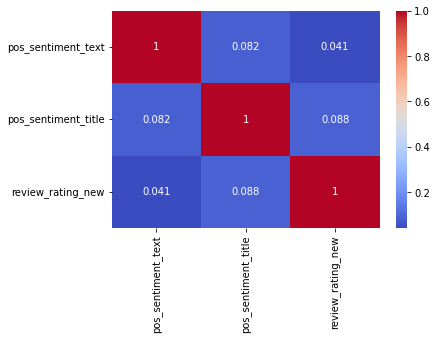

In [40]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df2[['pos_sentiment_text', 'pos_sentiment_title', 'review_rating_new']].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')